## Latency

In [655]:
file = './latency/network_latency_eta100.txt'
with open(file, "r") as f: 
    records = []
    for line in f.readlines():
        line = line.strip('\n')
        records.append(line)
start_time = records[0]
end_time = records[-1]
records = records[1:-1]
#records

In [656]:
import ast
end_index = [0]
end_index += [i for (i,v) in enumerate(records) if v == '-----one service finish-----']
services = ['front-end', 'user', 'catalogue', 'orders', 'carts', 'payment', 'shipping']
res_dict = {}
for i in range(len(end_index)-1):
    if i==0:
        res = records[end_index[i]:end_index[i+1]]
    else:
        res = records[end_index[i]+1:end_index[i+1]]
    sev_index = int(res[0])
    sev = services[sev_index]
    results = res[1:]
    values = []
    for n in range(1,11):
        ite = results.index(str(n))
        if results[ite+1] == sev:
            try:
                if results[ite+2] != str(n+1):
                    values.append(ast.literal_eval(results[ite+2]))
            except:
                pass
        else:
            break
    res_dict[sev] = values
#res_dict

In [657]:
import numpy as np

def ac_k(pred, k):
    ac_ks = []
    for each in pred:
        if each <= k:
            ac_v = 1
        else:
            ac_v = 0
        ac_ks.append(ac_v)
    return ac_ks

def avg_k(pred, k):
    sum_ks = np.zeros(shape=(len(pred),))
    for i in range(k):
        ac_i = ac_k(pred, i+1)
        sum_ks += np.array(ac_i)
    avg_ks = sum_ks/k
    return(avg_ks)

all_pred_orders = []
for key,values in res_dict.items():
    true_rca = services.index(key)
    #print(true_rca)
    pred_orders = []
    for each in values:
        order_v = [x[1] for x in each]
        d = dict(each)
        v = d[true_rca]
        od = order_v.index(v)+1 
        pred_orders.append(od)
    all_pred_orders.append(pred_orders)

all_mean = 0
for i in range(7):
    test = all_pred_orders[i]
    #print(test)
    #print(ac_k(test, 3))
    avg_5 = avg_k(test, 5).tolist()
    print(avg_5)
    all_mean += np.mean(avg_5)
print(round(all_mean/7,4))

[0.4, 0.2, 0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.2, 0.4]
[0.4, 0.2, 0.4, 0.4, 0.4, 0.2, 0.2, 0.0, 0.4, 0.0]
[0.2, 0.2, 0.2, 0.2, 0.6, 0.2, 0.4, 0.2, 0.2, 1.0]
[0.0, 0.4, 0.6, 0.0, 0.2, 0.4, 0.2, 0.2, 0.4, 0.4]
[0.4, 0.8, 0.4, 1.0, 0.2, 0.4, 0.4, 0.6, 0.2, 0.4]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.4, 1.0, 1.0, 0.6, 1.0, 0.8, 1.0, 0.6, 1.0]
0.5086


In [658]:
normal = [0.6244, 0.6143, 0.5815]
gamma5 = [0.5397, 0.5229, 0.5]
gamma75 = [0.5657, 0.6229, 0.5457]
eta100 = [0.5693, 0.5345, 0.5086]
eta1000 = [0.3972, 0.6002, 0.4645]

In [659]:
chr(955)+'='+'0.25',chr(951)+'='+'10'

('λ=0.25', 'η=10')

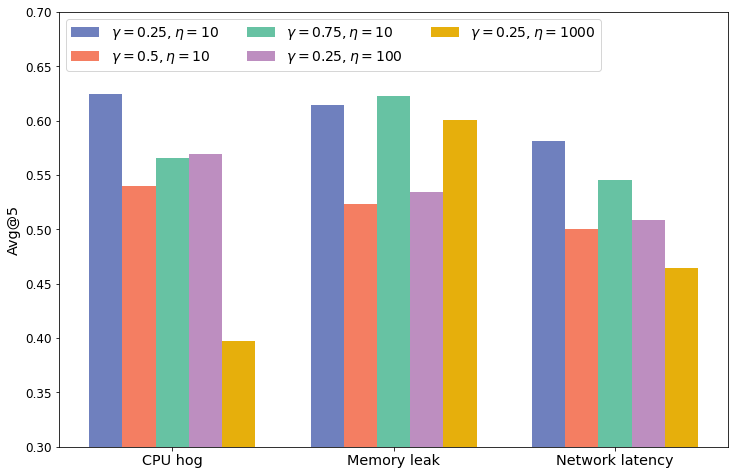

In [698]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ['CPU hog','Memory leak','Network latency']
#org_means = (0.8563, 0.8439, 0.5009, 0.8573, 0.8602)
#org_err = [0,0,0,0,0]

normal = [0.6244, 0.6143, 0.5815]
gamma5 = [0.5397, 0.5229, 0.5]
gamma75 = [0.5657, 0.6229, 0.5457]
eta100 = [0.5693, 0.5345, 0.5086]
eta1000 = [0.3972, 0.6002, 0.4645]

width=0.15
x = np.arange(len(labels))

label1 = r'$\gamma = 0.25, \eta = 10$'
label2 = r'$\gamma = 0.5, \eta = 10$'
label3 = r'$\gamma = 0.75, \eta = 10$'
label4 = r'$\gamma = 0.25, \eta = 100$'
label5 = r'$\gamma = 0.25, \eta = 1000$'

fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(x,org_means)
#ax.errorbar(x,org_means,yerr=org_err, label='NoMLP')
rects1 = ax.bar(x-2*width, normal, width, label=label1, color='#6F80BE') #'#1f77b4')#, color='#F0D879')#,yerr=mlp_err)
rects2 = ax.bar(x-1*width, gamma5, width, label=label2, color='#F47E62') #'#ff7f0e')#, color='#ed7d31')#,yerr=mlp_err)
rects3 = ax.bar(x+0*width, gamma75, width, label=label3, color='#67C2A3') #'#2ca02c')#, color='#70ad47')#,yerr=mlp_err)
rects4 = ax.bar(x+1*width, eta100, width, label=label4, color='#BD8EC0') #'#9467bd')#, color='#c82423')#,yerr=mlp_err)
rects5 = ax.bar(x+2*width, eta1000, width, label=label5, color='#E6AF0C') #'#d62728')#, color='#c82423')#,yerr=mlp_err)

#ax.errorbar(x,mlp_means,yerr=mlp_err, label='WithMLP')

# for rect in rects1:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects2:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects3:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects4:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects5:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlabel('Anomaly types', fontsize='x-large')
ax.set_ylabel('Avg@5', fontsize='x-large')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize='x-large')
ax.set_ylim(0.3,0.7)
ax.legend(loc='upper left', fontsize=14, ncol=3)
#plt.grid(axis="y")
plt.savefig('latency_gamma_eta.pdf')
plt.show()

### Gamma

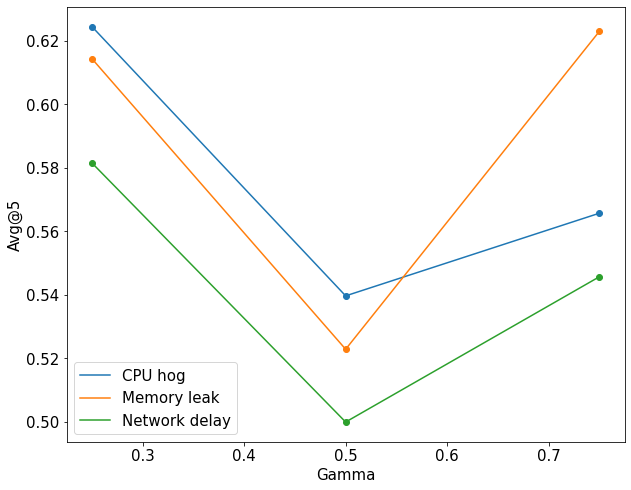

In [661]:
import matplotlib.pyplot as plt

# Define the x and y data for the lines
x = [0.25, 0.5, 0.75]
cpu = [0.6244, 0.5397, 0.5657]
memory = [0.6143, 0.5229, 0.6229]
network = [0.5815, 0.5, 0.5457]

# Plot the lines
plt.figure(figsize=(10,8))
plt.plot(x, cpu, label='CPU hog')
plt.scatter(x, cpu, marker='o')

plt.plot(x, memory, label='Memory leak')
plt.scatter(x, memory, marker='o')

plt.plot(x, network, label='Network delay')
plt.scatter(x, network, marker='o')

# Add a title and axis labels
plt.xlabel('Gamma', fontsize=15)
plt.ylabel('Avg@5', fontsize=15)

# Set the font size of the x and y axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add a legend
plt.legend(fontsize=15)
plt.savefig('latency_gamma.pdf')
# Display the plot
plt.show()


### Eta

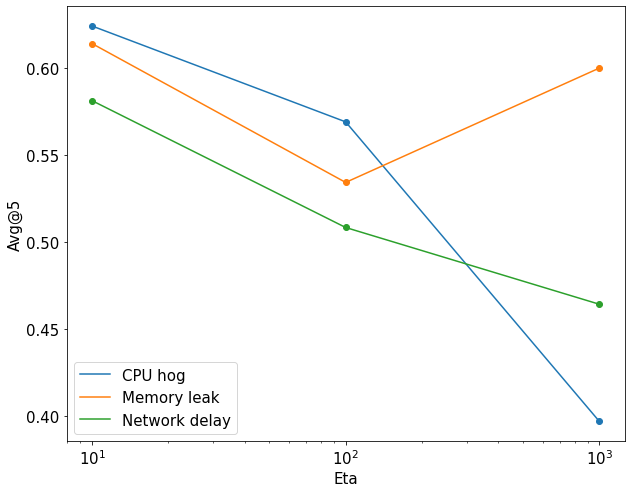

In [662]:
import matplotlib.pyplot as plt

# Define the x and y data for the lines
x = [10, 100, 1000]
cpu = [0.6244, 0.5693, 0.3972]
memory = [0.6143, 0.5345, 0.6002]
network = [0.5815, 0.5086, 0.4645]

plt.figure(figsize=(10,8))
# Plot the lines
plt.xscale('log')
plt.plot(x, cpu, label='CPU hog')
plt.scatter(x, cpu, marker='o')

plt.plot(x, memory, label='Memory leak')
plt.scatter(x, memory, marker='o')

plt.plot(x, network, label='Network delay')
plt.scatter(x, network, marker='o')

# Add a title and axis labels
plt.xlabel('Eta', fontsize=15)
plt.ylabel('Avg@5', fontsize=15)

# Set the font size of the x and y axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add a legend
plt.legend(fontsize=15)
plt.savefig('latency_eta.pdf')
# Display the plot
plt.show()


In [663]:
# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline
# plt.style.use('default')

# labels = ['CPU hog','Memory leak','Network delay']

# width=0.2
# x = np.arange(len(labels))

# fig, ax = plt.subplots(figsize=(12,8))
# rects1 = ax.bar(x-width, cpu, width, label='CPU hog', color='#F0D879')#, color='#F0D879')#, color='#5b9bd5')#,yerr=mlp_err)
# rects2 = ax.bar(x, mem, width, label='Memory leak')#, color='#248888')#, color='#ed7d31')#,yerr=mlp_err)
# rects3 = ax.bar(x+width, net, width, label='Network delay')#, color='#E6E6E6')#, color='#70ad47')#,yerr=mlp_err)

# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# ax.set_xlabel('Service', fontsize=18)
# ax.set_ylabel('Avg@5', fontsize='x-large')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.set_ylim(0,1.2)
# ax.legend(loc='upper left', fontsize=18)
# #plt.grid(axis="y")
# plt.savefig('service-single_ac3.pdf')
# plt.show()

## Single service

In [664]:
file = './single_service/network_single_service_eta1000.txt'
with open(file, "r") as f: 
    records = []
    for line in f.readlines():
        line = line.strip('\n')
        records.append(line)
start_time = records[0]
end_time = records[-1]
records = records[1:-1]
#records

In [665]:
import ast
end_index = [0]
end_index += [i for (i,v) in enumerate(records) if v == '-----one service finish-----']
services = ['front-end', 'user', 'catalogue', 'orders', 'carts', 'payment', 'shipping']
res_dict = {}
for i in range(len(end_index)-1):
    if i==0:
        res = records[end_index[i]:end_index[i+1]]
    else:
        res = records[end_index[i]+1:end_index[i+1]]
    sev_index = int(res[0])
    sev = services[sev_index]
    results = res[1:]
    values = []
    ite_list = [i for (i,v) in enumerate(results) if v == sev]
    for n in range(1,11):
        ite = ite_list[n-1]
        try:
            if results[ite+1] != str(n+1):
                values.append(ast.literal_eval(results[ite+1]))
            else:
                continue
        except:
            pass      
    res_dict[sev] = values
#res_dict

In [666]:
import numpy as np

def ac_k(pred, k):
    ac_ks = []
    for each in pred:
        if each <= k:
            ac_v = 1
        else:
            ac_v = 0
        ac_ks.append(ac_v)
    return ac_ks

def avg_k(pred, k, length):
    sum_ks = np.zeros(shape=(len(pred),))
    if (length) < k:
        max_v = length
    else: 
        max_v = k
    for i in range(max_v):
        ac_i = ac_k(pred, i+1)
        sum_ks += np.array(ac_i)
    avg_ks = sum_ks/max_v
    return(avg_ks)
cpu_truth_rcas = [1,1,1,1,1,1,1]
mem_truth_rcas = [2,2,2,2,2,2,2]
net_truth_rcas = [4,4,4,5,4,3,3]
all_pred_orders = []
all_nodes_length = []
for key,values in res_dict.items():
    length = len(values[0])
    true_rca = net_truth_rcas[services.index(key)]
    #print(true_rca)
    pred_orders = []
    for each in values:
        order_v = [x[1] for x in each]
        d = dict(each)
        v = d[true_rca]
        od = order_v.index(v)+1 
        pred_orders.append(od)
    all_nodes_length.append(length)
    all_pred_orders.append(pred_orders)

all_mean = 0
for i in range(7):
    nodes_n = all_nodes_length[i]
    test = all_pred_orders[i]
    #print(ac_k(test, 3))
    avg_5 = avg_k(test, 5, nodes_n).tolist()
    print(avg_5)
    all_mean += np.mean(avg_5)
print(round(all_mean/7,4))

[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
[0.6, 0.6, 0.4, 1.0, 0.8, 0.2, 0.4]
[0.8, 0.6, 0.8, 0.4, 0.6, 0.8, 0.4, 1.0, 0.6]
[0.6, 0.8, 0.6, 1.0, 0.4, 0.8, 0.4, 1.0, 0.4]
[0.6, 0.6, 0.4, 0.8, 0.2, 0.2, 0.6, 0.4, 0.6, 0.6]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0]
[0.5, 0.5, 0.75, 0.5, 0.75, 0.75, 0.75]
0.6885


In [667]:
normal = [0.67, 0.6771, 0.6681]
gamma5 = [0.6257, 0.6571, 0.675]
gamma75 = [0.5629, 0.6378, 0.6677]
eta100 = [0.6171, 0.68, 0.661]
eta1000 = [0.601, 0.6962, 0.6885]

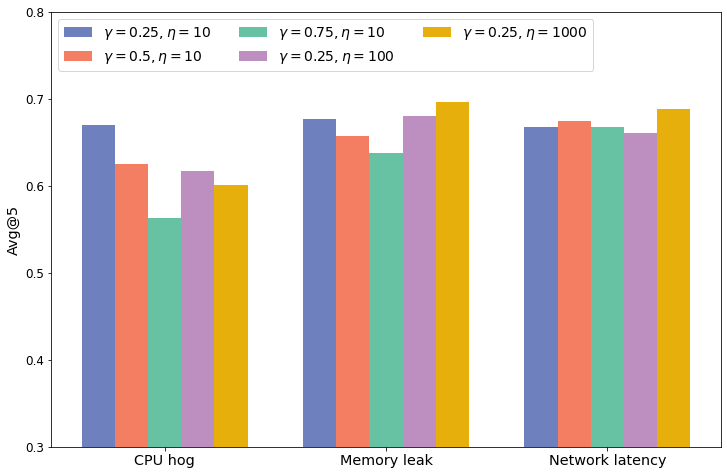

In [697]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ['CPU hog','Memory leak','Network latency']
#org_means = (0.8563, 0.8439, 0.5009, 0.8573, 0.8602)
#org_err = [0,0,0,0,0]

normal = [0.67, 0.6771, 0.6681]
gamma5 = [0.6257, 0.6571, 0.675]
gamma75 = [0.5629, 0.6378, 0.6677]
eta100 = [0.6171, 0.68, 0.661]
eta1000 = [0.601, 0.6962, 0.6885]

width=0.15
x = np.arange(len(labels))

label1 = r'$\gamma = 0.25, \eta = 10$'
label2 = r'$\gamma = 0.5, \eta = 10$'
label3 = r'$\gamma = 0.75, \eta = 10$'
label4 = r'$\gamma = 0.25, \eta = 100$'
label5 = r'$\gamma = 0.25, \eta = 1000$'

fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(x,org_means)
#ax.errorbar(x,org_means,yerr=org_err, label='NoMLP')
rects1 = ax.bar(x-2*width, normal, width, label=label1, color='#6F80BE') #'#1f77b4')#, color='#F0D879')#,yerr=mlp_err)
rects2 = ax.bar(x-1*width, gamma5, width, label=label2, color='#F47E62') #'#ff7f0e')#, color='#ed7d31')#,yerr=mlp_err)
rects3 = ax.bar(x+0*width, gamma75, width, label=label3, color='#67C2A3') #'#2ca02c')#, color='#70ad47')#,yerr=mlp_err)
rects4 = ax.bar(x+1*width, eta100, width, label=label4, color='#BD8EC0') #'#9467bd')#, color='#c82423')#,yerr=mlp_err)
rects5 = ax.bar(x+2*width, eta1000, width, label=label5, color='#E6AF0C') #'#d62728')#, color='#c82423')#,yerr=mlp_err)

#ax.errorbar(x,mlp_means,yerr=mlp_err, label='WithMLP')

# for rect in rects1:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects2:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects3:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects4:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects5:
#     ax.text(rect.get_x()+0.01, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlabel('Anomaly types', fontsize='x-large')
ax.set_ylabel('Avg@5', fontsize='x-large')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize='x-large')
ax.set_ylim(0.3,0.8)
ax.legend(loc='upper left', fontsize=14, ncol=3)
#plt.grid(axis="y")
plt.savefig('single_service_gamma_eta.pdf')
plt.show()

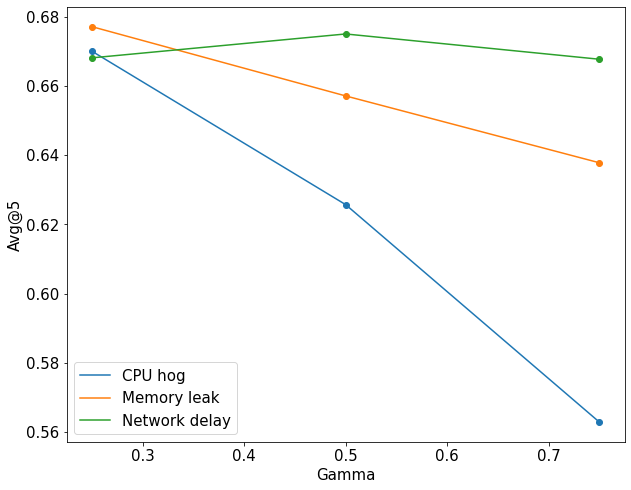

In [669]:
import matplotlib.pyplot as plt

# Define the x and y data for the lines
x = [0.25, 0.5, 0.75]
cpu = [0.67, 0.6257, 0.5629]
memory = [0.6771, 0.6571, 0.6378]
network = [0.6681, 0.675, 0.6677]

plt.figure(figsize=(10,8))
# Plot the lines
plt.plot(x, cpu, label='CPU hog')
plt.scatter(x, cpu, marker='o')

plt.plot(x, memory, label='Memory leak')
plt.scatter(x, memory, marker='o')

plt.plot(x, network, label='Network delay')
plt.scatter(x, network, marker='o')

# Add a title and axis labels
plt.xlabel('Gamma', fontsize=15)
plt.ylabel('Avg@5', fontsize=15)

# Set the font size of the x and y axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add a legend
plt.legend(fontsize=15)
plt.savefig('single_service_gamma.pdf')
# Display the plot
plt.show()


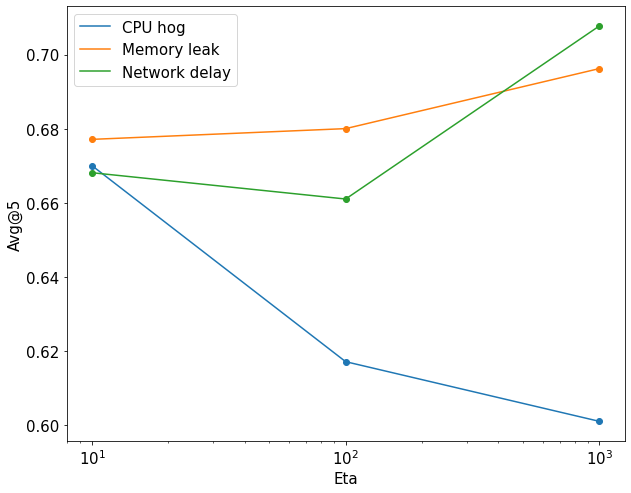

In [670]:
import matplotlib.pyplot as plt

# Define the x and y data for the lines

x = [10, 100, 1000]
cpu = [0.67, 0.6171, 0.601]
memory = [0.6771, 0.68, 0.6962]
network = [0.6681, 0.661, 0.7077]

plt.figure(figsize=(10,8))
# Plot the lines
plt.xscale('log')
plt.plot(x, cpu, label='CPU hog')
plt.scatter(x, cpu, marker='o')

plt.plot(x, memory, label='Memory leak')
plt.scatter(x, memory, marker='o')

plt.plot(x, network, label='Network delay')
plt.scatter(x, network, marker='o')

# Add a title and axis labels
plt.xlabel('Eta', fontsize=15)
plt.ylabel('Avg@5', fontsize=15)

# Set the font size of the x and y axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add a legend
plt.legend(fontsize=15)
plt.savefig('single_service_eta.pdf')
# Display the plot
plt.show()


## All service

In [671]:
file = './all_service/network_all_service_eta1000.txt'
with open(file, "r") as f: 
    records = []
    for line in f.readlines():
        line = line.strip('\n')
        records.append(line)
start_time = records[0]
end_time = records[-1]
records = records[1:-1]
#records

In [672]:
import ast
end_index = [0]
end_index += [i for (i,v) in enumerate(records) if v == '-----one service finish-----']
services = ['front-end', 'user', 'catalogue', 'orders', 'carts', 'payment', 'shipping']
res_dict = {}
for i in range(len(end_index)-1):
    if i==0:
        res = records[end_index[i]:end_index[i+1]]
    else:
        res = records[end_index[i]+1:end_index[i+1]]
    sev_index = int(res[0])
    sev = services[sev_index]
    results = res[1:]
    values = []
    ite_index = [results.index(str(n)) for n in range(1,11)]
    for n in range(9):
        each_value = []
        value = results[ite_index[n]+2:ite_index[n+1]]
        for each in value:
            start_index = each.find("(")
            ed_index = each.find(")")
            result_str = each[start_index:ed_index+1]
            result_tuple = eval(result_str)
            each_value.append(result_tuple)
        if len(each_value) != 0:
            values.append(each_value)
    res_dict[sev] = values
#res_dict

In [673]:
import numpy as np

def ac_k(pred, k):
    ac_ks = []
    for each in pred:
        if each <= k:
            ac_v = 1
        else:
            ac_v = 0
        ac_ks.append(ac_v)
    return ac_ks

def avg_k(pred, k, length):
    sum_ks = np.zeros(shape=(len(pred),))
    if (length) < k:
        max_v = length
    else: 
        max_v = k
    for i in range(max_v):
        ac_i = ac_k(pred, i+1)
        sum_ks += np.array(ac_i)
    avg_ks = sum_ks/max_v
    return(avg_ks)
cpu_truth_rcas = [1,6,11,15,21,27,30]
mem_truth_rcas = [2,7,12,16,23,28,32]
net_truth_rcas = [4,9,15,19,24,29,35]
all_pred_orders = []
all_nodes_length = []
for key,values in res_dict.items():
    length = len(values[0])
    true_rca = net_truth_rcas[services.index(key)]
    #print(true_rca)
    pred_orders = []
    for each in values:
        order_v = [x[1] for x in each]
        d = dict(each)
        v = d[true_rca]
        od = order_v.index(v)+1 
        pred_orders.append(od)
    all_nodes_length.append(length)
    all_pred_orders.append(pred_orders)

all_mean = 0
for i in range(7):
    test = all_pred_orders[i]
    all_mean += np.mean(test)
print(round(all_mean/7,4))

17.4444


In [674]:
normal = [12, 15, 14]
gamma5 = [15, 12.8, 20]
gamma75 = [14.76, 12.3, 17.9]
eta100 = [17.76, 14.5, 19.92]
eta1000 = [17.56, 13.4, 17.44]

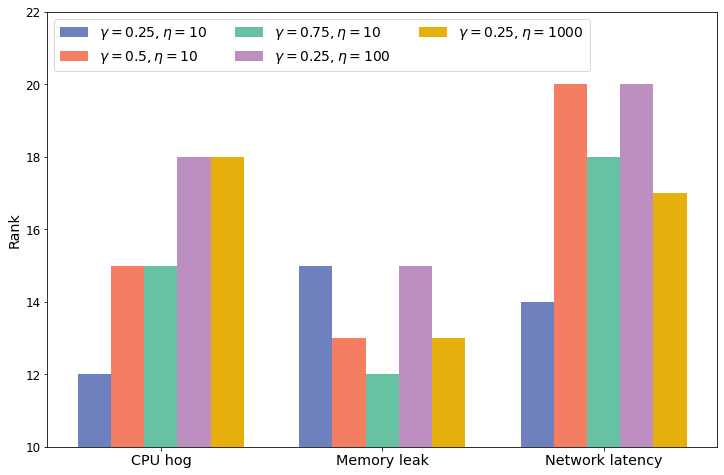

In [696]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ['CPU hog','Memory leak','Network latency']
#org_means = (0.8563, 0.8439, 0.5009, 0.8573, 0.8602)
#org_err = [0,0,0,0,0]

normal = [12, 15, 14]
gamma5 = [15, 13, 20]
gamma75 = [15, 12, 18]
eta100 = [18, 15, 20]
eta1000 = [18, 13, 17]

width=0.15
x = np.arange(len(labels))

label1 = r'$\gamma = 0.25, \eta = 10$'
label2 = r'$\gamma = 0.5, \eta = 10$'
label3 = r'$\gamma = 0.75, \eta = 10$'
label4 = r'$\gamma = 0.25, \eta = 100$'
label5 = r'$\gamma = 0.25, \eta = 1000$'

fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(x,org_means)
#ax.errorbar(x,org_means,yerr=org_err, label='NoMLP')
rects1 = ax.bar(x-2*width, normal, width, label=label1, color='#6F80BE') #'#1f77b4')#, color='#F0D879')#,yerr=mlp_err)
rects2 = ax.bar(x-1*width, gamma5, width, label=label2, color='#F47E62') #'#ff7f0e')#, color='#ed7d31')#,yerr=mlp_err)
rects3 = ax.bar(x+0*width, gamma75, width, label=label3, color='#67C2A3') #'#2ca02c')#, color='#70ad47')#,yerr=mlp_err)
rects4 = ax.bar(x+1*width, eta100, width, label=label4, color='#BD8EC0') #'#9467bd')#, color='#c82423')#,yerr=mlp_err)
rects5 = ax.bar(x+2*width, eta1000, width, label=label5, color='#E6AF0C') #'#d62728')#, color='#c82423')#,yerr=mlp_err)

#ax.errorbar(x,mlp_means,yerr=mlp_err, label='WithMLP')

# for rect in rects1:
#     ax.text(rect.get_x()+0.05, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects2:
#     ax.text(rect.get_x()+0.05, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects3:
#     ax.text(rect.get_x()+0.05, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects4:
#     ax.text(rect.get_x()+0.05, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)
# for rect in rects5:
#     ax.text(rect.get_x()+0.05, rect.get_height(), rect.get_height(), ha='left', va='bottom', fontsize=9)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlabel('Anomaly types', fontsize='x-large')
ax.set_ylabel('Rank', fontsize='x-large')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize='x-large')
ax.set_ylim(10,22)
ax.legend(loc='upper left', fontsize=14, ncol=3)
#plt.grid(axis="y")
plt.savefig('all_service_gamma_eta.pdf')
plt.show()

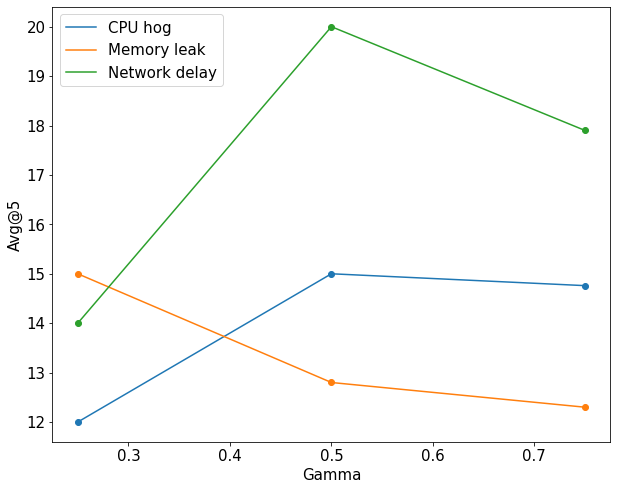

In [676]:
import matplotlib.pyplot as plt

# Define the x and y data for the lines
x = [0.25, 0.5, 0.75]
cpu = [12, 15, 14.76]
memory = [15, 12.8, 12.3]
network = [14, 20, 17.9]

plt.figure(figsize=(10,8))
# Plot the lines
plt.plot(x, cpu, label='CPU hog')
plt.scatter(x, cpu, marker='o')

plt.plot(x, memory, label='Memory leak')
plt.scatter(x, memory, marker='o')

plt.plot(x, network, label='Network delay')
plt.scatter(x, network, marker='o')

# Add a title and axis labels
plt.xlabel('Gamma', fontsize=15)
plt.ylabel('Avg@5', fontsize=15)

# Set the font size of the x and y axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add a legend
plt.legend(fontsize=15)
plt.savefig('all_service_gamma.pdf')
# Display the plot
plt.show()


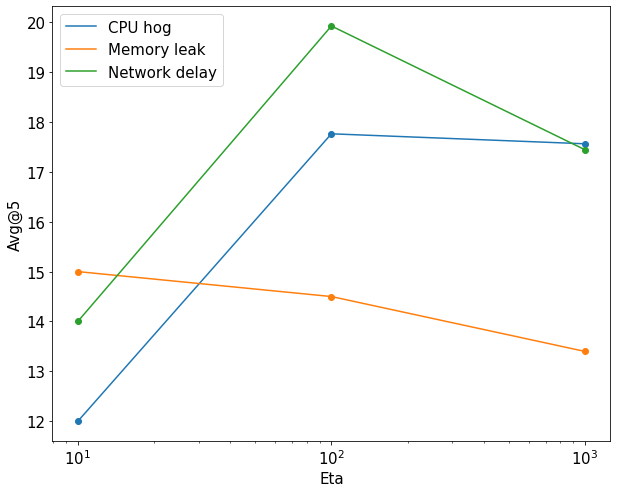

In [677]:
import matplotlib.pyplot as plt

# Define the x and y data for the lines
x = [10, 100, 1000]
cpu = [12, 17.76, 17.56]
memory = [15, 14.5, 13.4]
network = [14, 19.92, 17.44]

plt.figure(figsize=(10,8))
# Plot the lines
plt.xscale('log')
plt.plot(x, cpu, label='CPU hog')
plt.scatter(x, cpu, marker='o')

plt.plot(x, memory, label='Memory leak')
plt.scatter(x, memory, marker='o')

plt.plot(x, network, label='Network delay')
plt.scatter(x, network, marker='o')

# Add a title and axis labels
plt.xlabel('Eta', fontsize=15)
plt.ylabel('Avg@5', fontsize=15)

# Set the font size of the x and y axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add a legend
plt.legend(fontsize=15)
plt.savefig('all_service_eta.pdf')
# Display the plot
plt.show()
